In [7]:
#importing libraries
import numpy as np
import logomaker
import algo as algo
import matplotlib.pyplot as plt
import time



In [8]:
def drawLogo(motifs,title):
    # create a matrix of the motif
    counts_matrix = logomaker.alignment_to_matrix(motifs)

    # Convert counts to probabilities
    print(counts_matrix)
    # prob_matrix = counts_matrix / counts_matrix.sum(axis=1)
    row_sums = counts_matrix.sum(axis=1)
    print(row_sums)
    prob_matrix = counts_matrix / row_sums[0]
    print(prob_matrix)

    # Create a logo object
    logo = logomaker.Logo(prob_matrix, color_scheme='classic')

    # Customize the appearance (optional)
    logo.ax.set_title(title)
    logo.style_spines(visible=False)  # Hide spines
    # logo.style_xticks(fmt='%d', anchor = 0,spacing=50)  # Adjust x-axis ticks
    logo.ax.set_ylabel("Probability")

    # Show the logo
    logo.draw()
    print(prob_matrix)

def drawGraph(x1,y1,x2,y2,color,label,Y_axis) :
    plt.plot(x1, y1, color='blue', label=label[0])
    plt.plot(x2, y2, color='red', label=label[1])
    # Adding labels and title
    plt.xlabel('K-mer value K')
    plt.ylabel(Y_axis)
    # Adding legend
    plt.legend()

    # Displaying the plot
    plt.show()

In [9]:
def printMatrix(motifs):
    print("Matrix of the motifs")
    for i in range(len(motifs)):
        print(motifs[i])
    k = len(motifs[0])
    print("Avg Score of the motifs: ", algo.Score(motifs)/len(motifs[0]))
    print("\n")

In [11]:
# simulation with information gain
def main():
    input = ['data/hm03.txt','data/yst04r.txt','data/yst08r.txt']
    for inp in input:
        print(" for Input file: ", inp)
        dna = []
        # read the input file
        with open(inp, 'r') as f:
            dna = f.read().splitlines()
        bestMotifs = []
        bestMotifs2 = []

        x_values = []
        y_score1 = []
        y_score2 = []

        runnigTime1 = []
        runnigTime2 = []


        for i in range(8,25):
            print("K is : ", i)
            
            startTime = time.time()

            motifs = algo.multipleSeedSearchByDifScore(dna, 50, i, 100,algo.gibbsSamplerByDifScore)

            endTime = time.time()
            runnigTime1.append((endTime - startTime))

            print("Gibbs Sampler")
            print("Elasped time: ", (endTime - startTime), " seconds")
            printMatrix(motifs)
            x_values.append(i)
            y_score1.append(algo.difScore(motifs))
            if len(bestMotifs) == 0 or algo.Score(motifs)/len(motifs[0]) < algo.Score(bestMotifs2)/len(bestMotifs[0]) :
                bestMotifs = motifs
                # print('here')
            drawLogo(motifs,"Gibbs Sampler")

            # for randomized motif search

            startTime = time.time()

            motifs = algo.multipleSeedSearchByDifScore(dna, 50, i, 100,algo.RandomizedMotifSearchDifScore)

            endTime = time.time()
            runnigTime2.append((endTime - startTime))
            print("Randomized Motif Search")
            print("Elasped time: ", (endTime - startTime), " seconds")
            printMatrix(motifs)
            y_score2.append(algo.difScore(motifs))
            if len(bestMotifs2) == 0 or algo.Score(motifs)/len(motifs[0]) < algo.Score(bestMotifs2)/len(bestMotifs2[0]) :
                bestMotifs2 = motifs
                # print('here2')
            drawLogo(motifs,"Randomized Motif Search")
        

        drawGraph(x_values,y_score1,x_values,y_score2,'blue',['Gibbs Sampler','Randomized Motif Search'],'Score')
        drawGraph(x_values,runnigTime1,x_values,runnigTime2,'green',['Gibbs Sampler','Randomized Motif Search'],'Running Time')


        print("Best Motifs1:")
        printMatrix(bestMotifs)
        drawLogo(bestMotifs,"Gibbs Sampler")

        print("Best Motifs2:")
        printMatrix(bestMotifs2)
        drawLogo(bestMotifs2,"Randomized Motif Search")
        

 for Input file:  data/hm03.txt
K is :  8
Gibbs Sampler
Elasped time:  6.577637434005737  seconds
Matrix of the motifs
AAAATCAA
AAAATCAA
AAAATAAA
AAAAAAAA
AAAAGCAA
AAAATAAA
AAAATCAA
AAAATAAA
AAAATCAA
AAAATCAA
Avg Score of the motifs:  0.75


      A  C  G  T
pos             
0    10  0  0  0
1    10  0  0  0
2    10  0  0  0
3    10  0  0  0
4     1  0  1  8
5     4  6  0  0
6    10  0  0  0
7    10  0  0  0
pos
0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
dtype: int64
       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0
4    0.1  0.0  0.1  0.8
5    0.4  0.6  0.0  0.0
6    1.0  0.0  0.0  0.0
7    1.0  0.0  0.0  0.0
       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0
4    0.1  0.0  0.1  0.8
5    0.4  0.6  0.0  0.0
6    1.0  0.0  0.0  0.0
7    1.0  0.0  0.0  0.0
Randomized Motif Search
Ela

/home/toriqe/.local/lib/python3.10/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


       A    C    G    T
pos                    
0    0.0  0.1  0.9  0.0
1    1.0  0.0  0.0  0.0
2    0.5  0.2  0.2  0.1
3    0.8  0.0  0.1  0.1
4    0.8  0.0  0.1  0.1
5    0.2  0.1  0.4  0.3
6    0.7  0.0  0.1  0.2
7    0.1  0.2  0.7  0.0
8    1.0  0.0  0.0  0.0
9    0.9  0.1  0.0  0.0
10   1.0  0.0  0.0  0.0
11   0.7  0.0  0.3  0.0
12   0.3  0.0  0.1  0.6
13   0.6  0.0  0.4  0.0
14   0.9  0.0  0.0  0.1
15   0.3  0.0  0.2  0.5
16   0.0  0.1  0.1  0.8
17   0.7  0.1  0.0  0.2
Randomized Motif Search
Elasped time:  3.6653501987457275  seconds
Matrix of the motifs
TTTAACTTAATATTTAAC
TTTAACTTAATATTTAAA
TTTAACTTAATATTTAAC
TTTATTTTGAAATTTAAA
GGTTATCTCATAATTCAA
TACAATTTAATATCCTAA
CTAATTTTTGTATTTTTA
TGCATTTTTTTCATTCAA
TATTTTTTAAAAAATCAA
TACAAATTTCTATTCCTT
Avg Score of the motifs:  2.8333333333333335


     A  C  G   T
pos             
0    0  1  1   8
1    3  0  2   5
2    1  3  0   6
3    8  0  0   2
4    6  0  0   4
5    1  3  0   6
6    0  1  0   9
7    0  0  0  10
8    5  1  1   3
9    7  

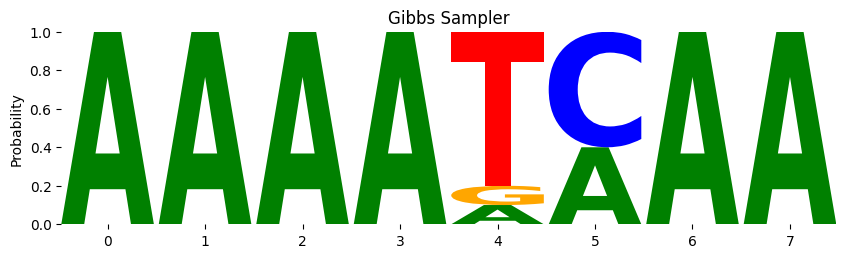

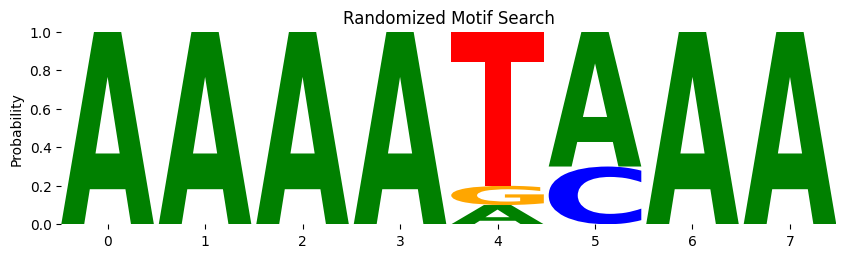

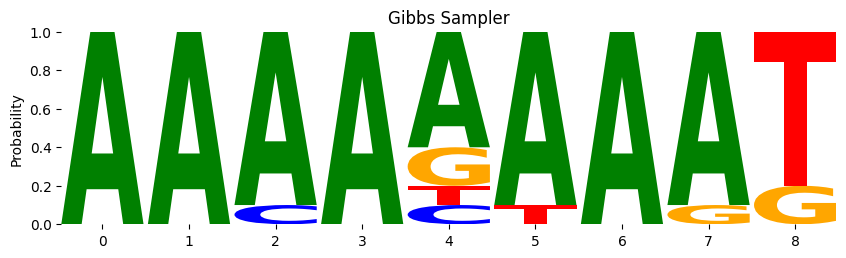

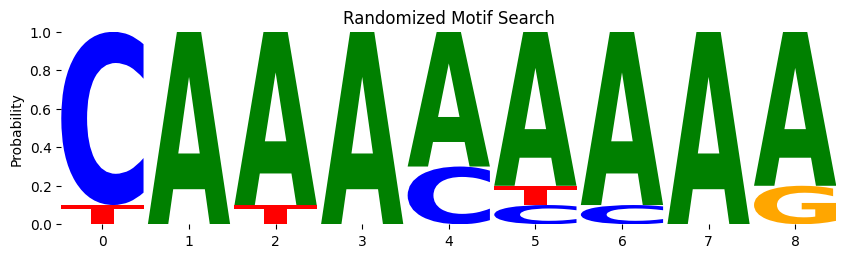

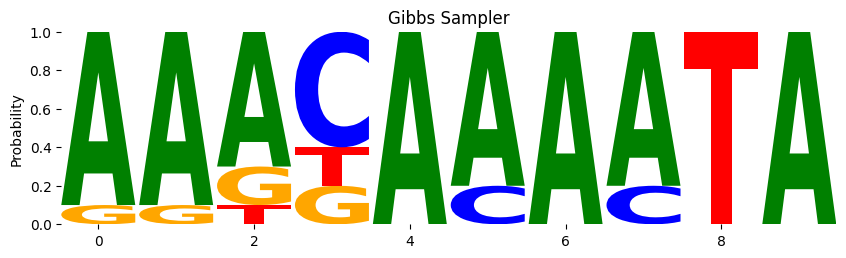

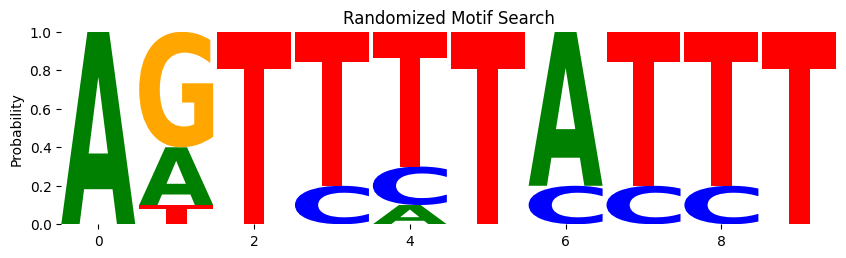

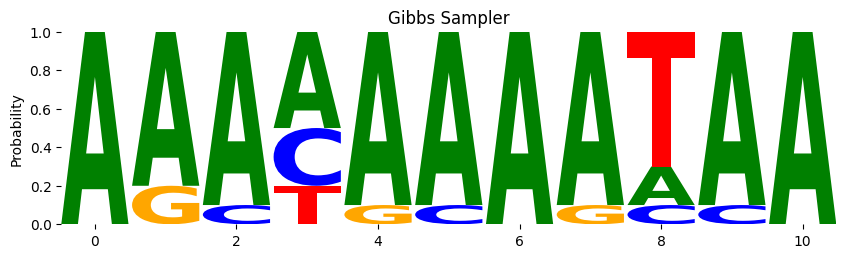

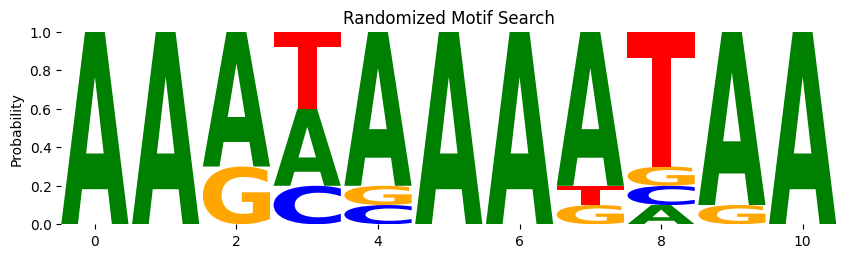

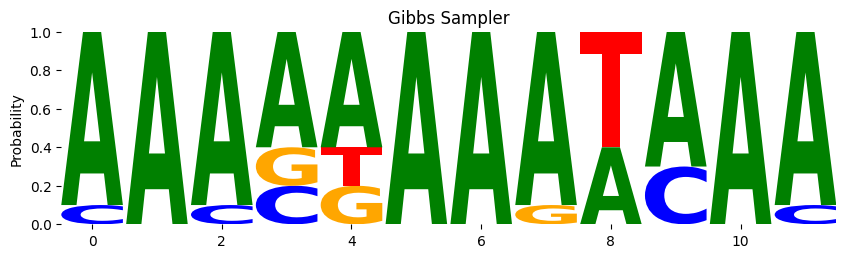

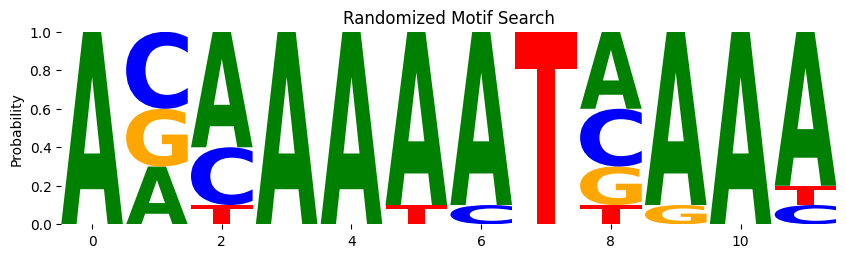

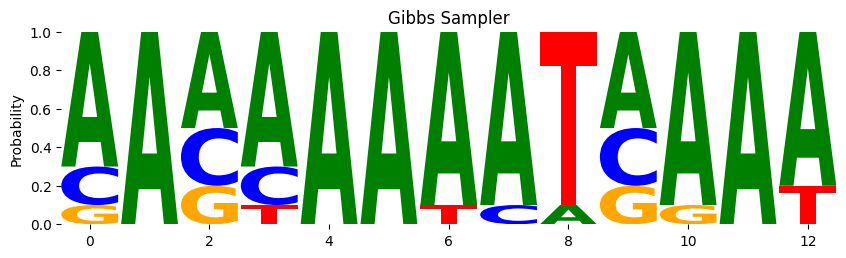

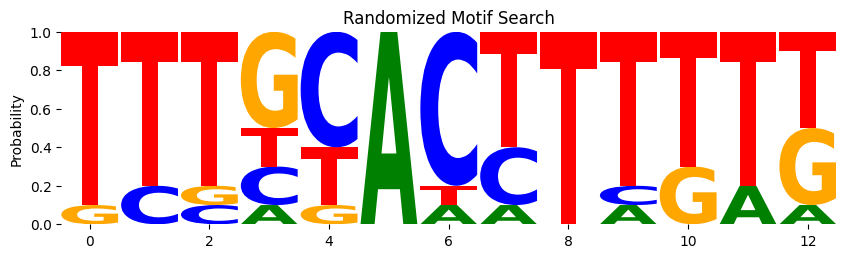

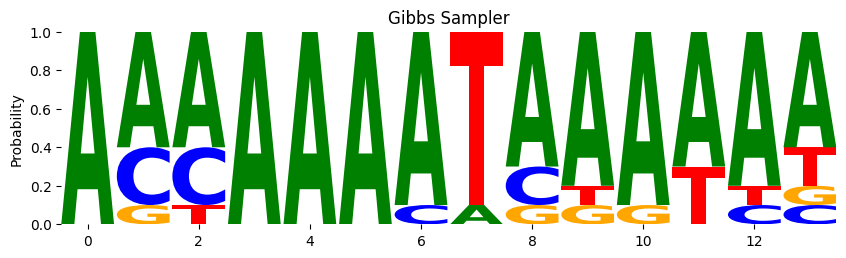

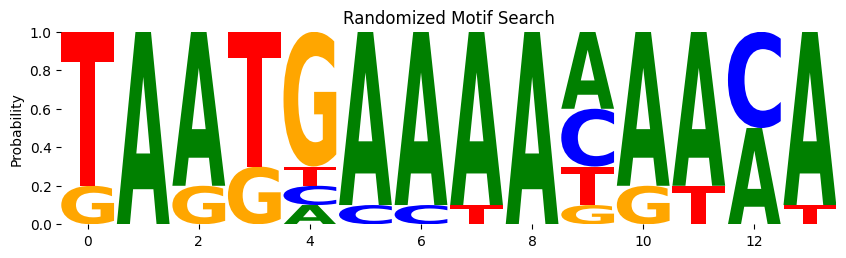

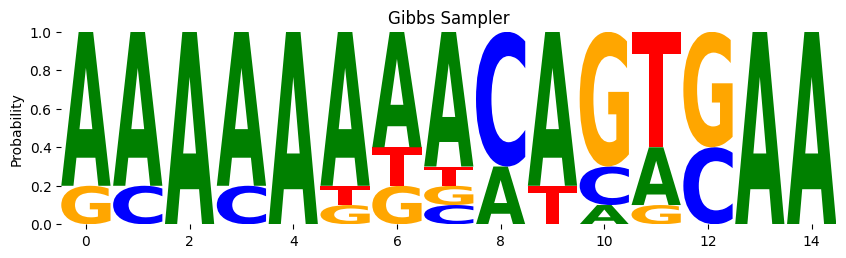

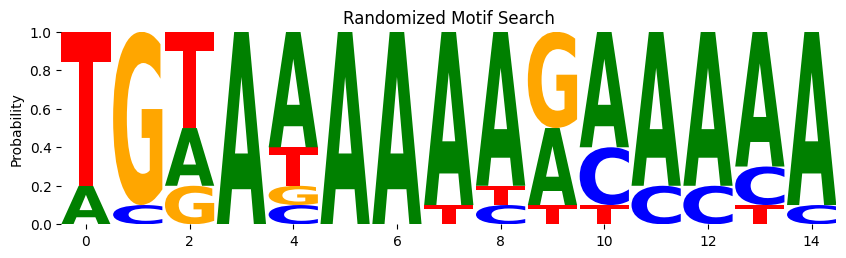

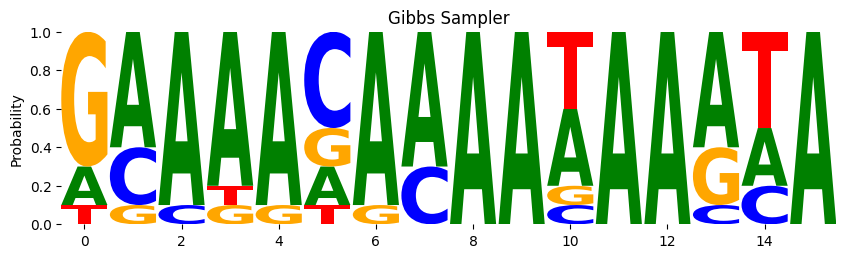

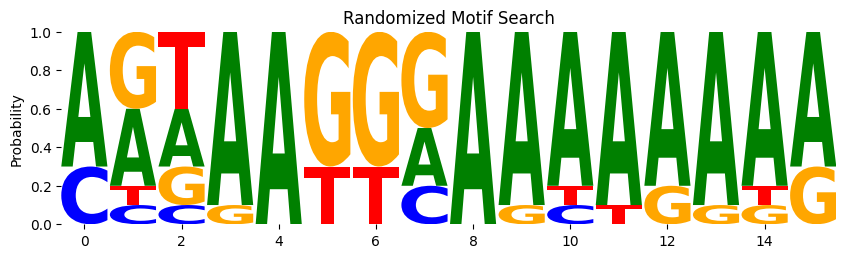

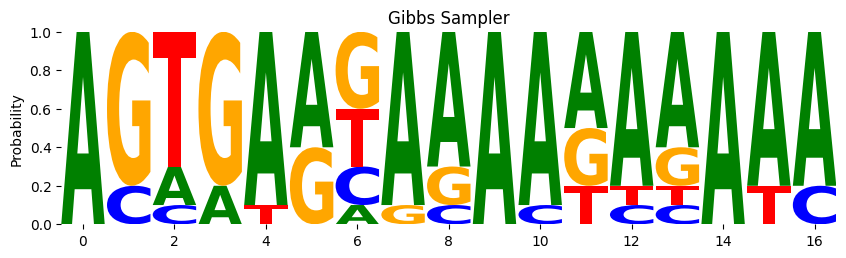

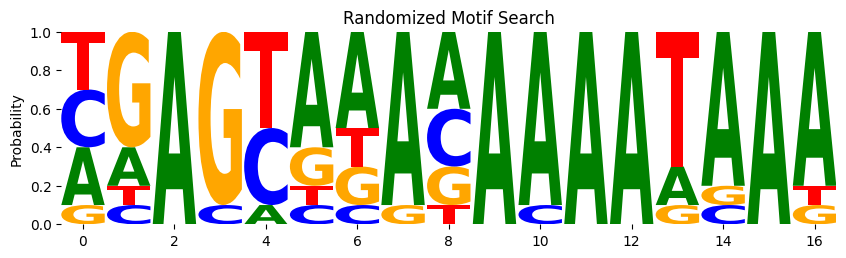

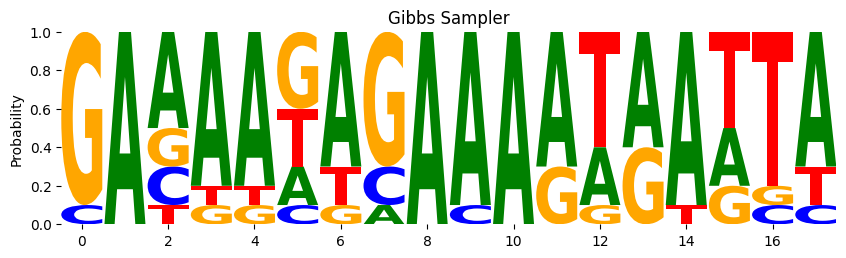

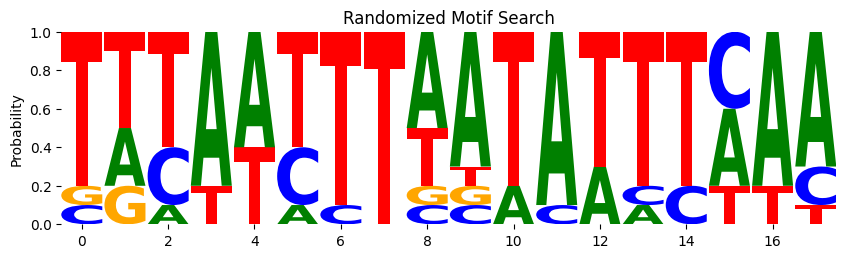

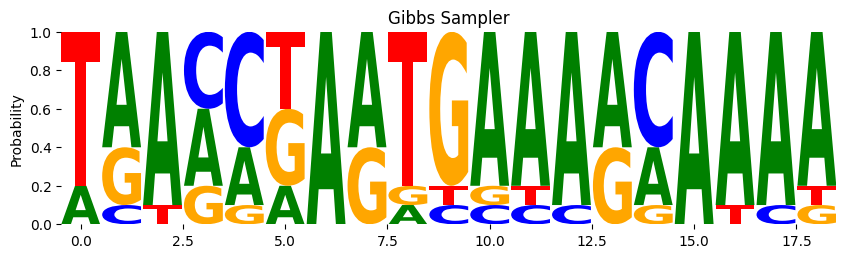

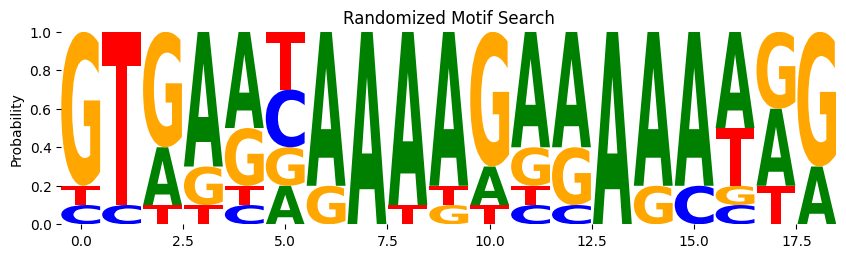

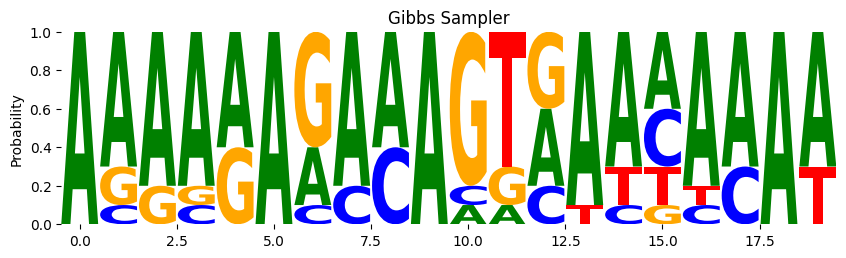

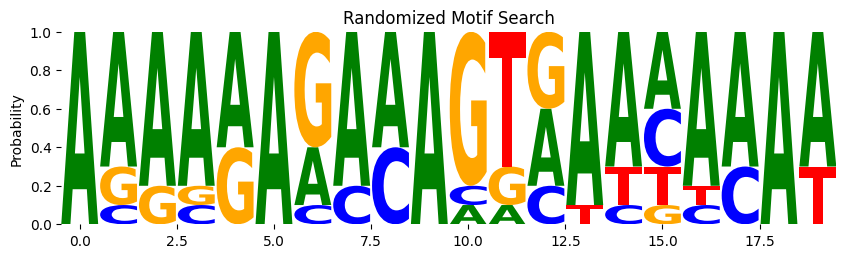

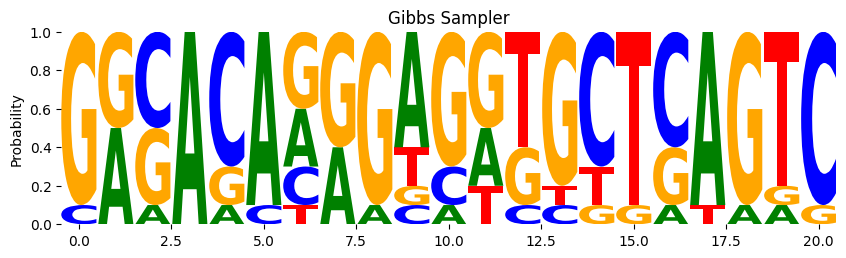

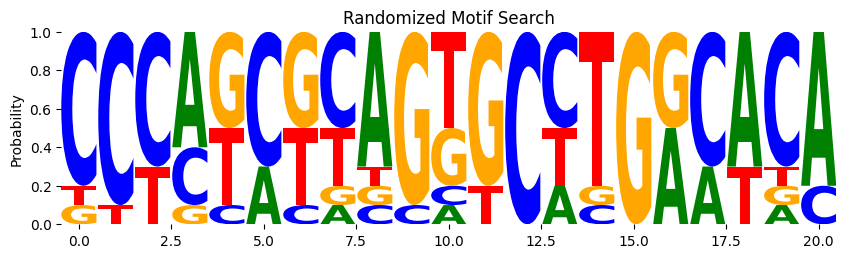

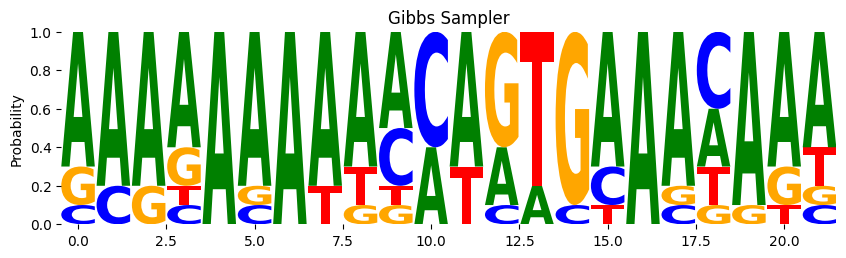

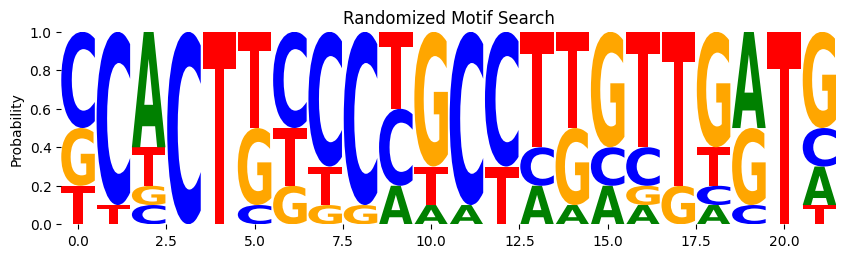

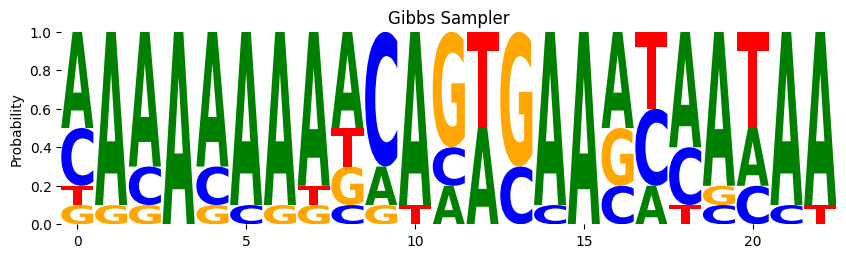

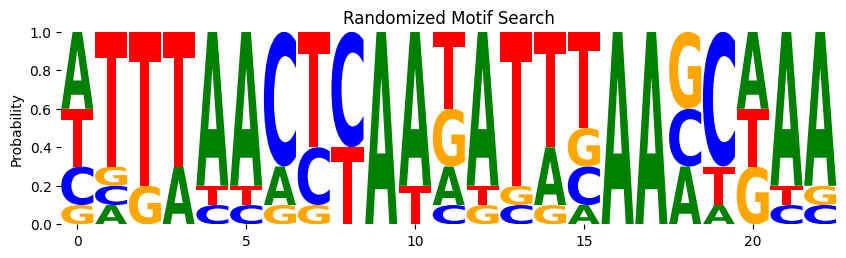

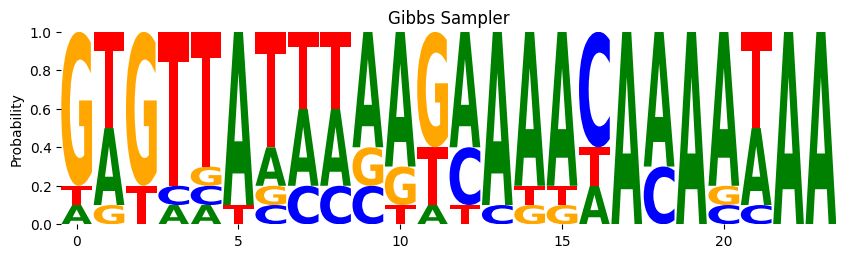

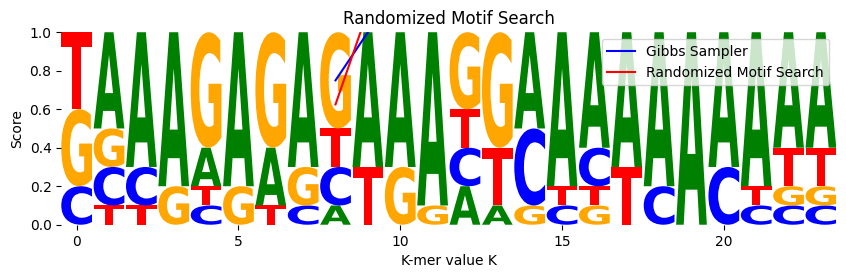

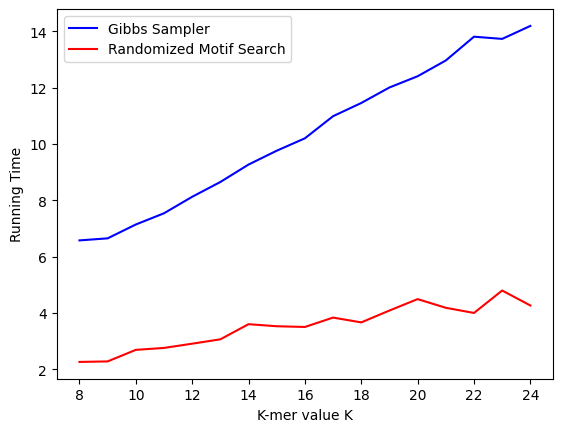

Best Motifs1:
Matrix of the motifs
AAAATCAA
AAAATCAA
AAAATAAA
AAAAAAAA
AAAAGCAA
AAAATAAA
AAAATCAA
AAAATAAA
AAAATCAA
AAAATCAA
Avg Score of the motifs:  0.75


      A  C  G  T
pos             
0    10  0  0  0
1    10  0  0  0
2    10  0  0  0
3    10  0  0  0
4     1  0  1  8
5     4  6  0  0
6    10  0  0  0
7    10  0  0  0
pos
0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
dtype: int64
       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0
4    0.1  0.0  0.1  0.8
5    0.4  0.6  0.0  0.0
6    1.0  0.0  0.0  0.0
7    1.0  0.0  0.0  0.0
       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0
4    0.1  0.0  0.1  0.8
5    0.4  0.6  0.0  0.0
6    1.0  0.0  0.0  0.0
7    1.0  0.0  0.0  0.0
Best Motifs2:
Matrix of the motifs
AAAATAAA
AAAATAAA
AAAATAAA
AAAAAAAA
AAAAGCAA
AAAATAAA
AAAATCAA
AAAATAAA
AAAA

/home/toriqe/.local/lib/python3.10/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


Randomized Motif Search
Elasped time:  1.6238470077514648  seconds
Matrix of the motifs
TTAATTTTTTTTTCTTT
TTTTGTTTGTATTCTTT
TTTTCCTCCATTTATTT
TTTCTTTTTTTTTCTTT
ATTTATTTTACTTCTTT
TTATTTTTCTTTTCTTA
TTATTTTTTTTTTGTTA
Avg Score of the motifs:  1.2941176470588236


     A  C  G  T
pos            
0    1  0  0  6
1    0  0  0  7
2    3  0  0  4
3    1  1  0  5
4    1  1  1  4
5    0  1  0  6
6    0  0  0  7
7    0  1  0  6
8    0  2  1  4
9    2  0  0  5
10   1  1  0  5
11   0  0  0  7
12   0  0  0  7
13   1  5  1  0
14   0  0  0  7
15   0  0  0  7
16   2  0  0  5
pos
0     7
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
dtype: int64
            A         C         G         T
pos                                        
0    0.142857  0.000000  0.000000  0.857143
1    0.000000  0.000000  0.000000  1.000000
2    0.428571  0.000000  0.000000  0.571429
3    0.142857  0.142857  0.000000  0.714286
4    0.142857  0.1

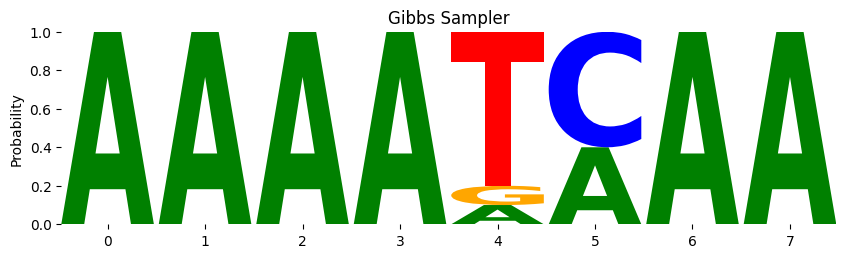

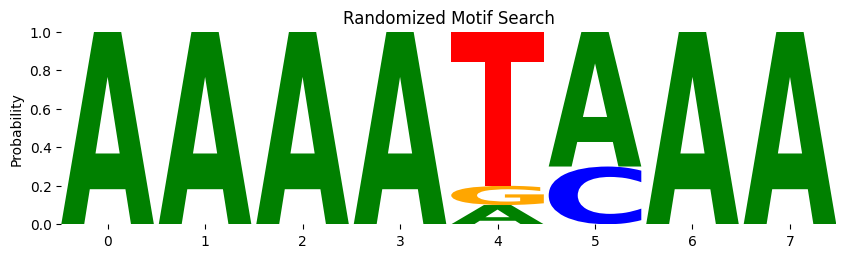

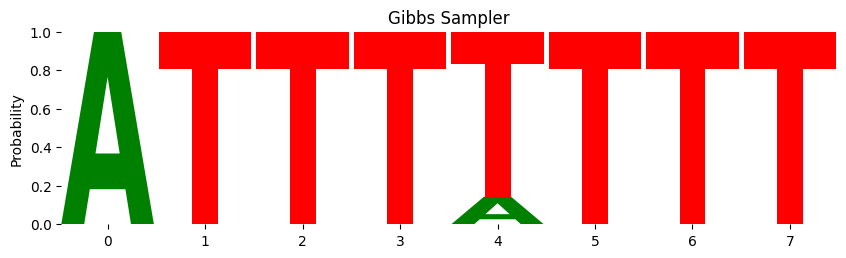

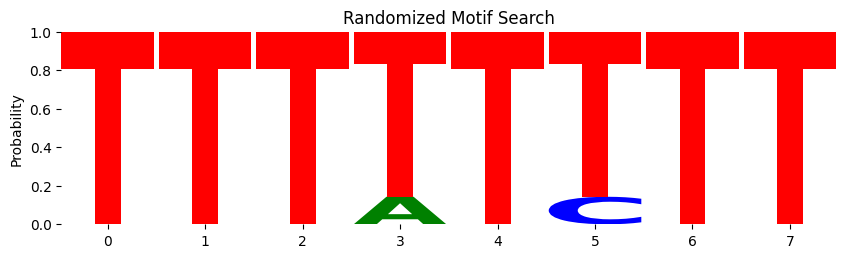

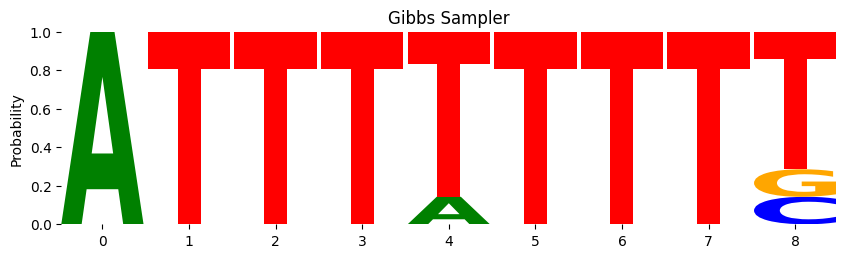

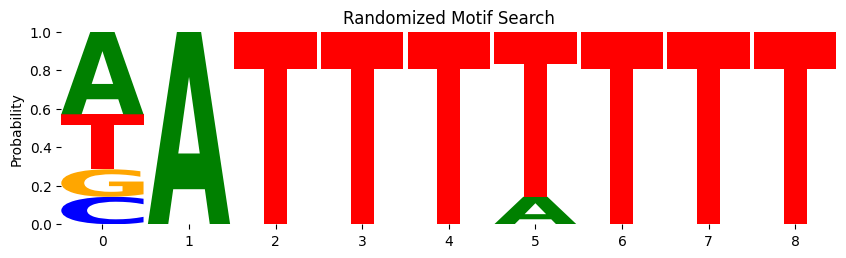

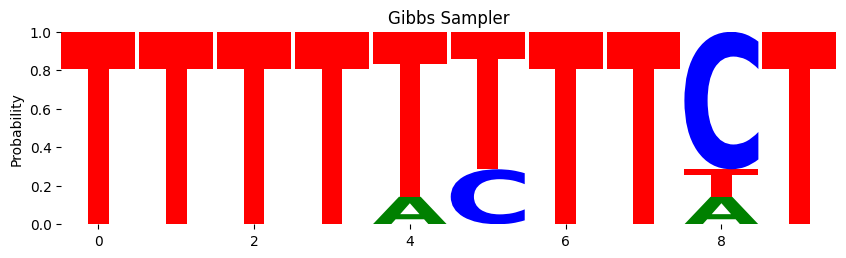

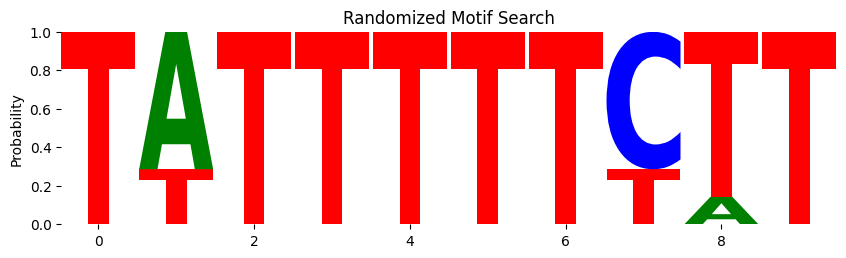

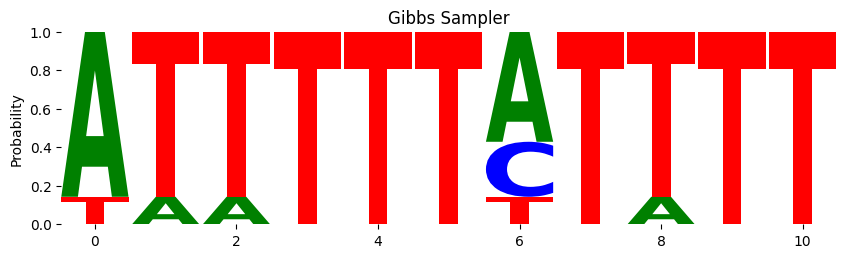

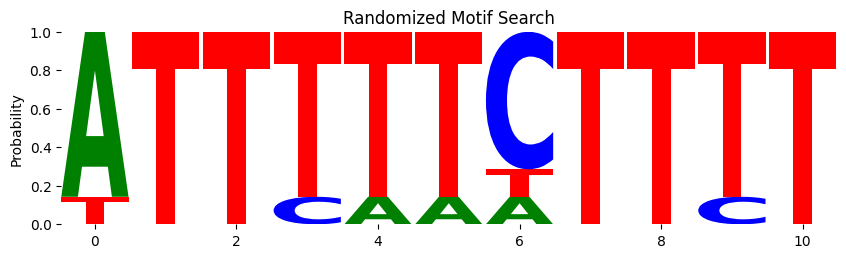

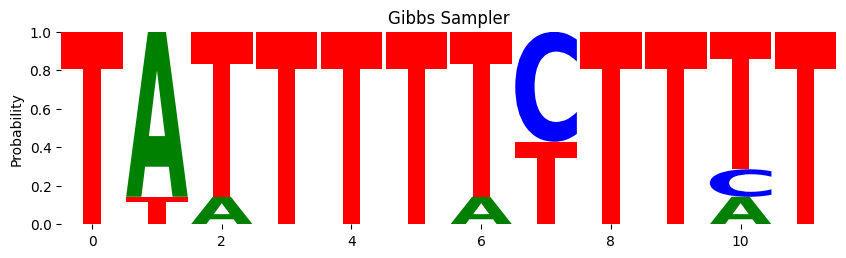

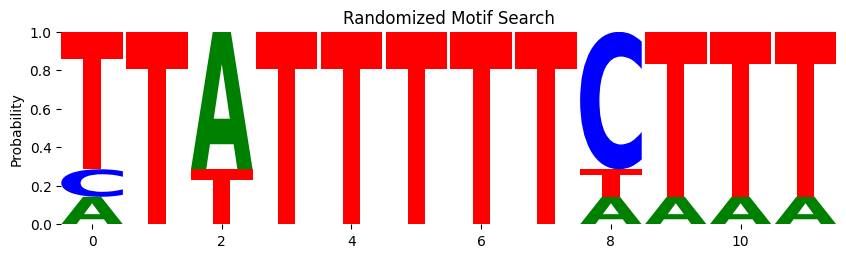

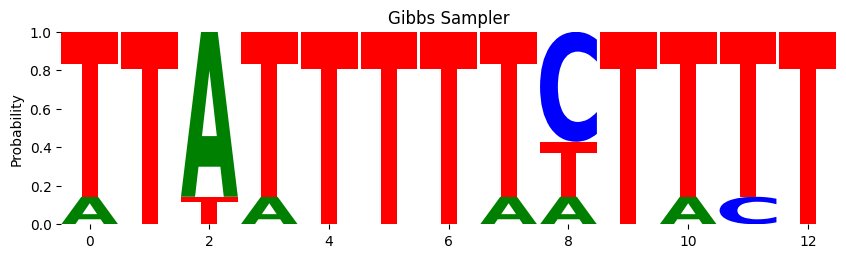

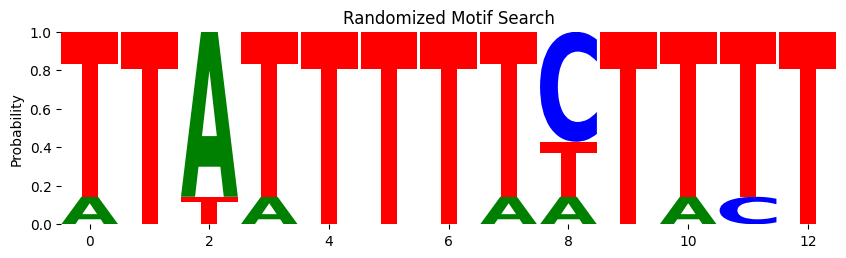

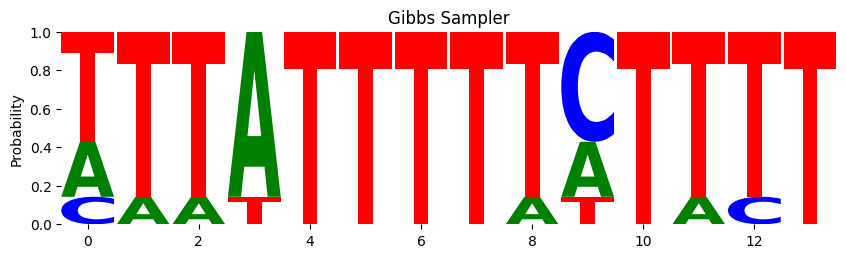

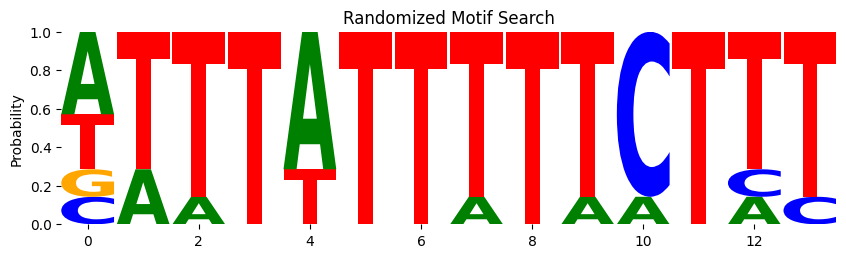

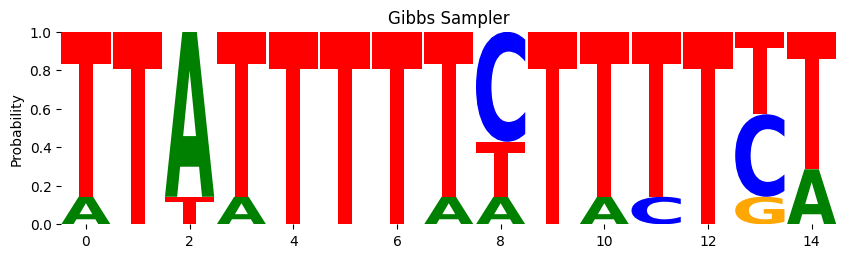

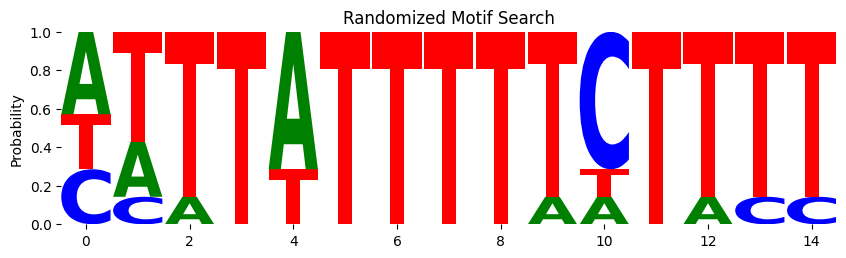

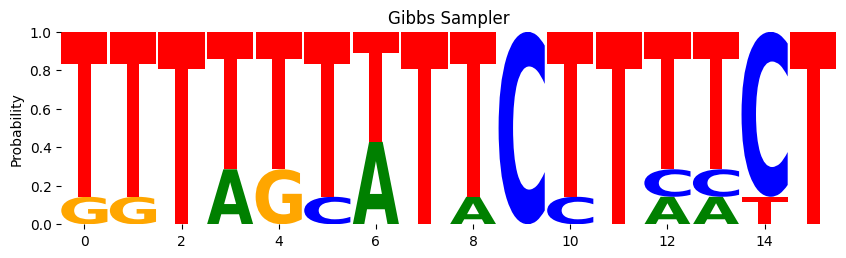

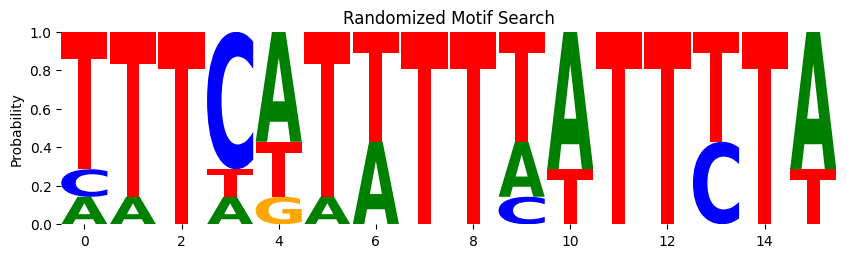

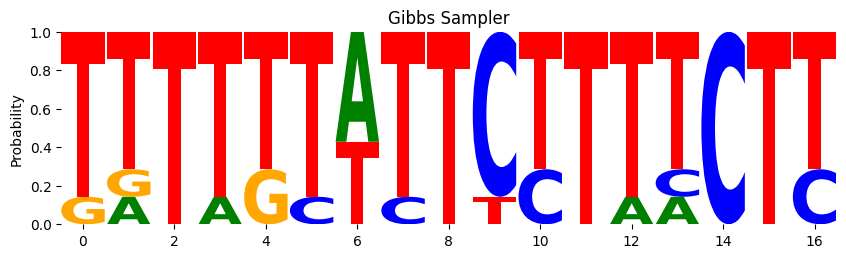

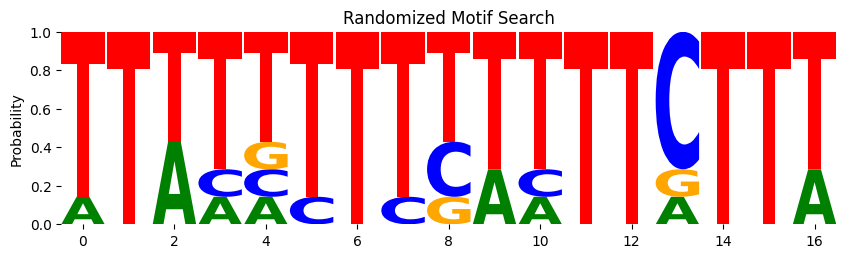

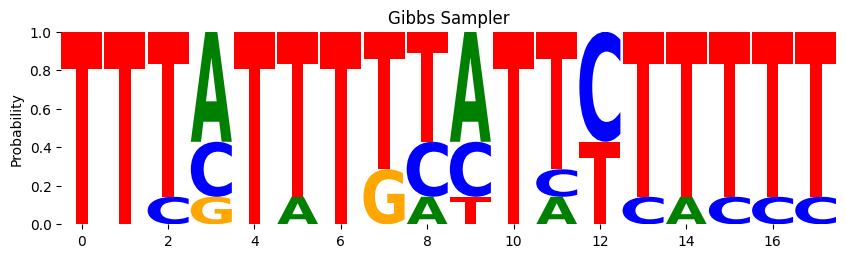

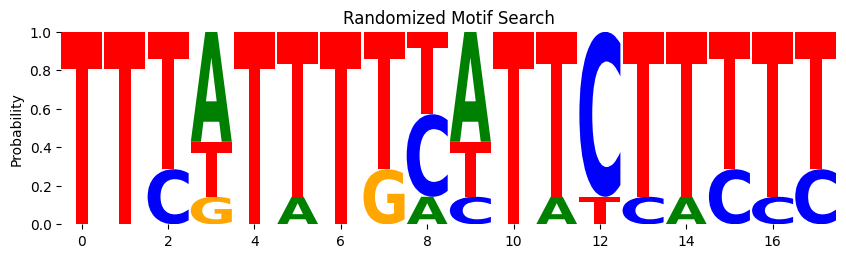

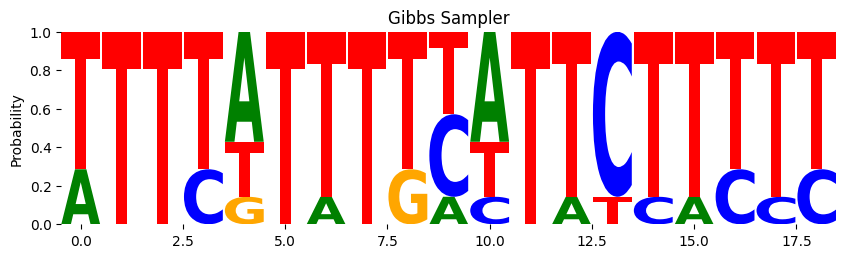

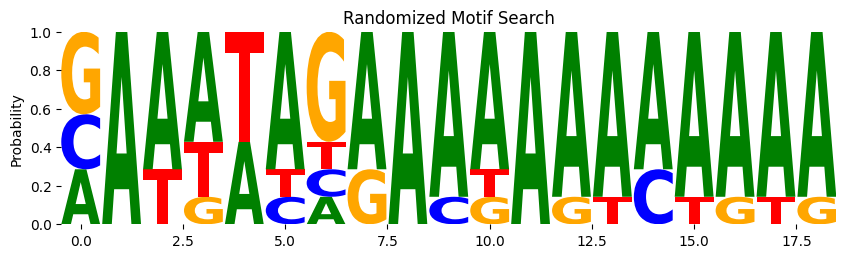

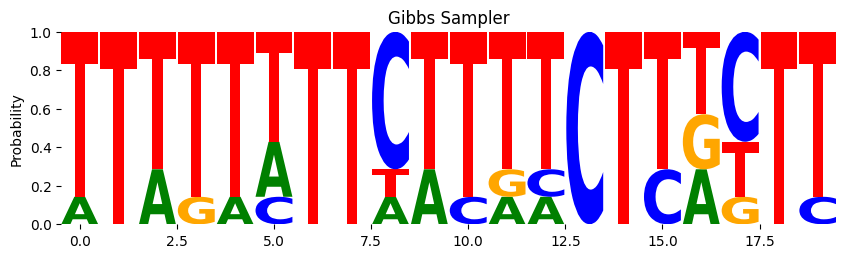

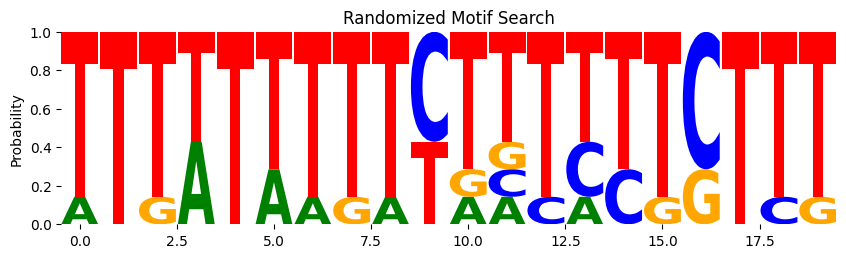

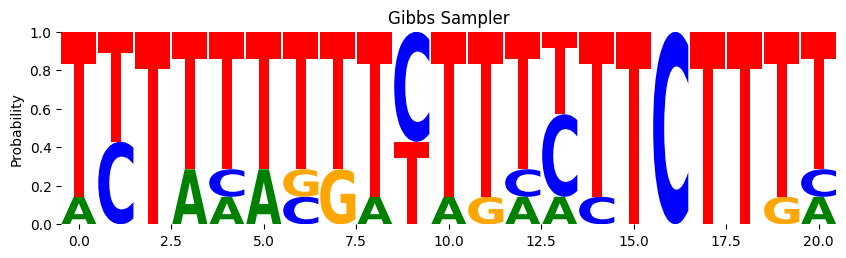

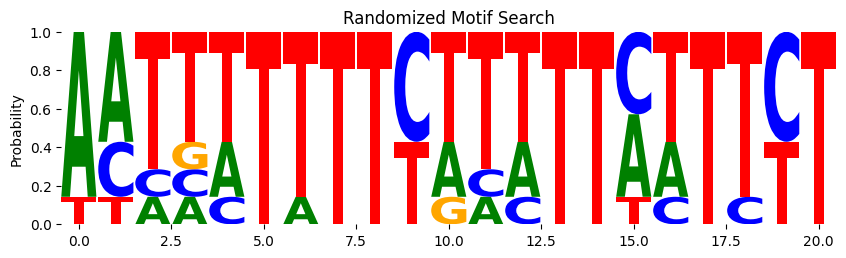

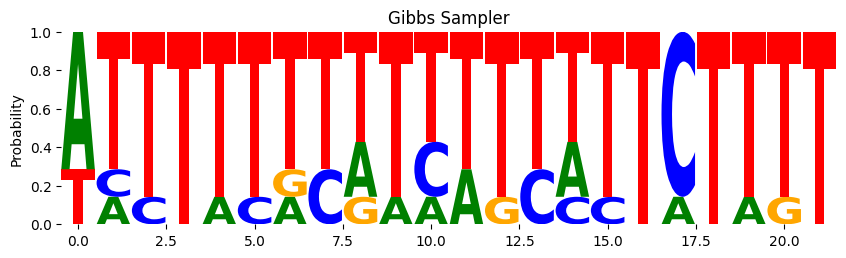

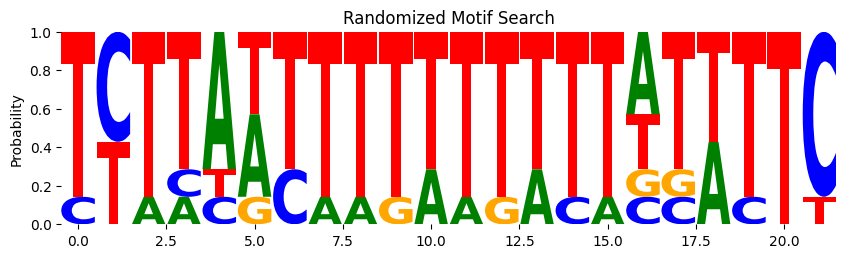

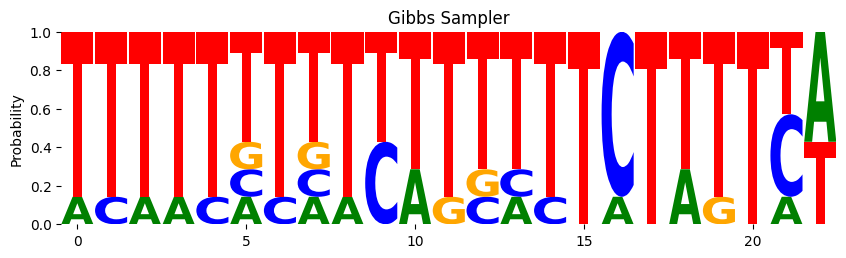

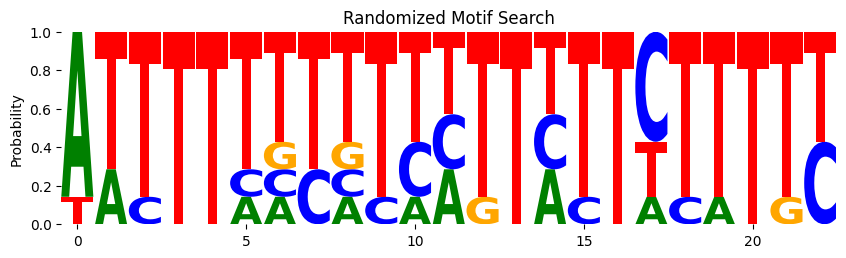

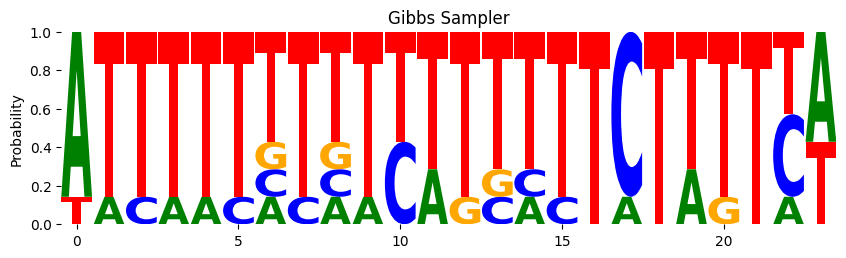

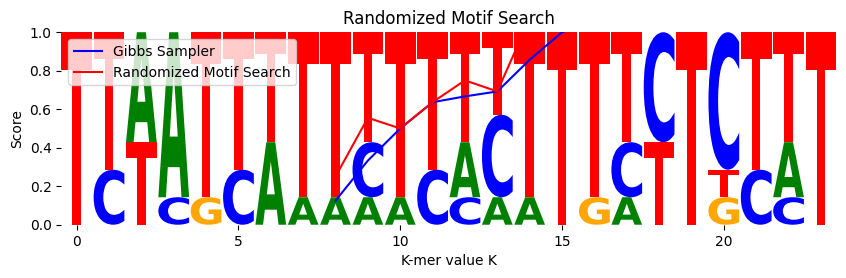

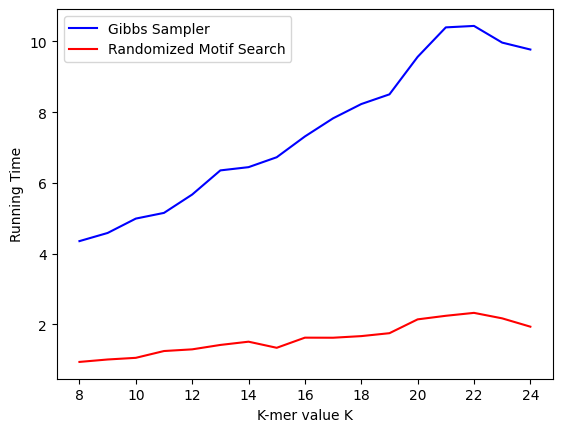

Best Motifs1:
Matrix of the motifs
ATTTTTTT
ATTTTTTT
ATTTTTTT
ATTTTTTT
ATTTATTT
ATTTTTTT
ATTTTTTT
Avg Score of the motifs:  0.125


     A  T
pos      
0    7  0
1    0  7
2    0  7
3    0  7
4    1  6
5    0  7
6    0  7
7    0  7
pos
0    7
1    7
2    7
3    7
4    7
5    7
6    7
7    7
dtype: int64
            A         T
pos                    
0    1.000000  0.000000
1    0.000000  1.000000
2    0.000000  1.000000
3    0.000000  1.000000
4    0.142857  0.857143
5    0.000000  1.000000
6    0.000000  1.000000
7    0.000000  1.000000
            A         T
pos                    
0    1.000000  0.000000
1    0.000000  1.000000
2    0.000000  1.000000
3    0.000000  1.000000
4    0.142857  0.857143
5    0.000000  1.000000
6    0.000000  1.000000
7    0.000000  1.000000
Best Motifs2:
Matrix of the motifs
TTTTTTTT
TTTTTCTT
TTTTTTTT
TTTTTTTT
TTTATTTT
TTTTTTTT
TTTTTTTT
Avg Score of the motifs:  0.25


     A  C  T
pos         
0    0  0  7
1    0  0  7
2    0  0  7
3    1  0  6
4    0

/home/toriqe/.local/lib/python3.10/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


Randomized Motif Search
Elasped time:  3.5531556606292725  seconds
Matrix of the motifs
TTATTTTACTTCTTTCT
ATTTTTATTTTATTTTT
TTTATTTTCATATTTCT
TTTTTTTTGTTAAAATT
TTTATTTCTTTCTTTTT
TTCTATTTTTTATTTTC
TTTTTTTTTTGATTTTT
TTTTTTTTTTTCCATTT
TCTTTTATGTTGTTTCA
TTTCTTTTTCTCTTTTT
TTTTTCTTTTTAATTCT
Avg Score of the motifs:  2.176470588235294


     A  C  G   T
pos             
0    1  0  0  10
1    0  1  0  10
2    1  1  0   9
3    2  1  0   8
4    1  0  0  10
5    0  1  0  10
6    2  0  0   9
7    1  1  0   9
8    0  2  2   7
9    1  1  0   9
10   0  0  1  10
11   6  4  1   0
12   2  1  0   8
13   2  0  0   9
14   1  0  0  10
15   0  4  0   7
16   1  1  0   9
pos
0     11
1     11
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
dtype: int64
            A         C         G         T
pos                                        
0    0.090909  0.000000  0.000000  0.909091
1    0.000000  0.090909  0.000000  0.909091

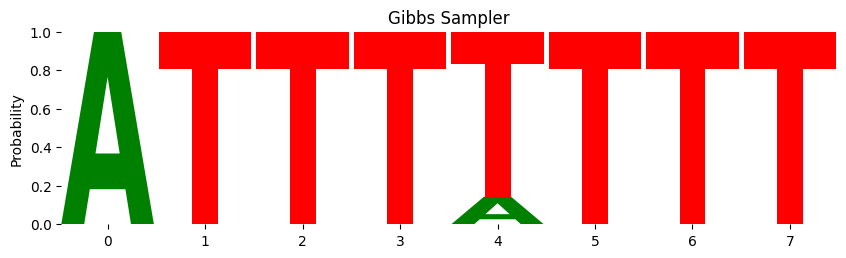

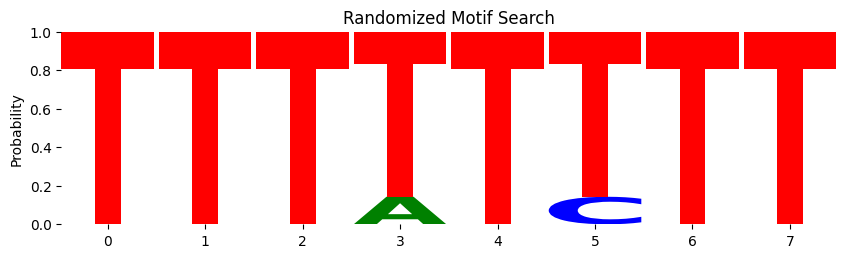

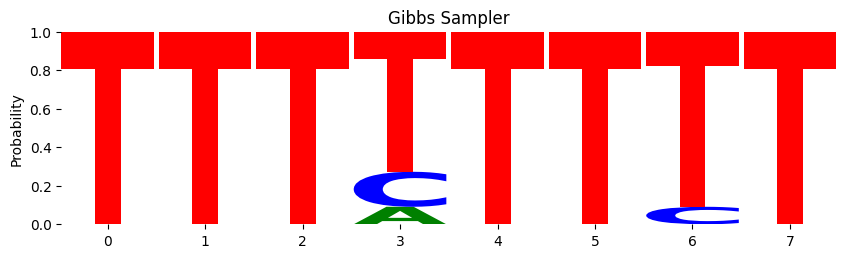

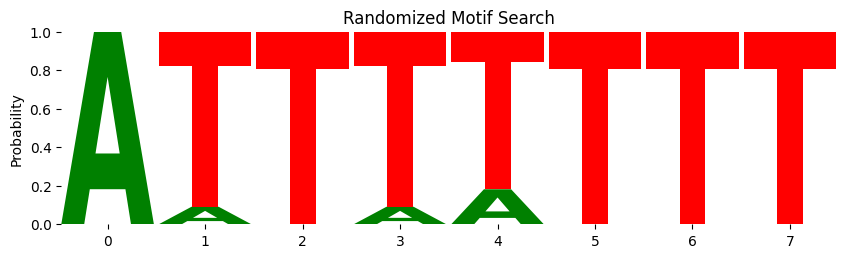

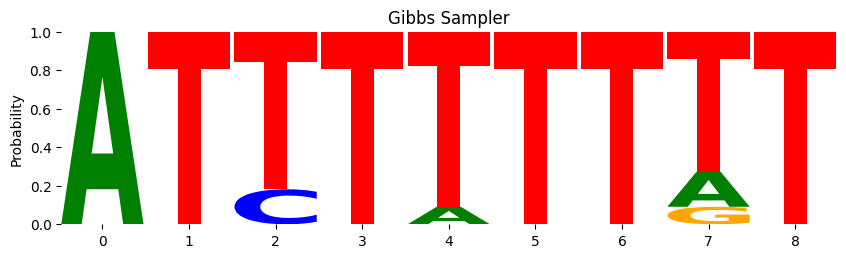

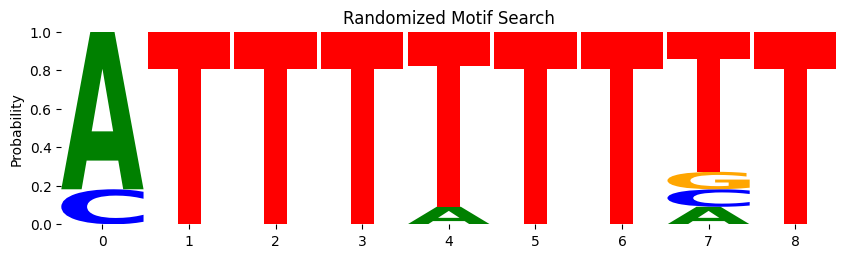

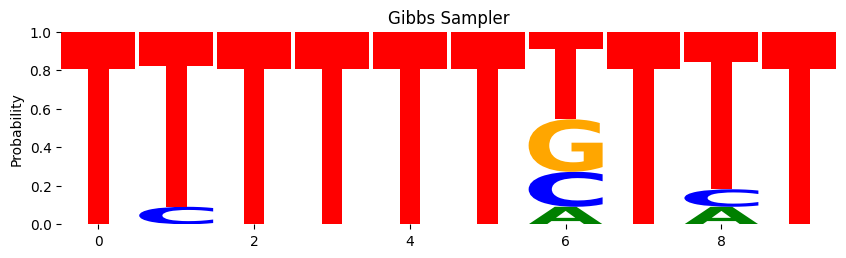

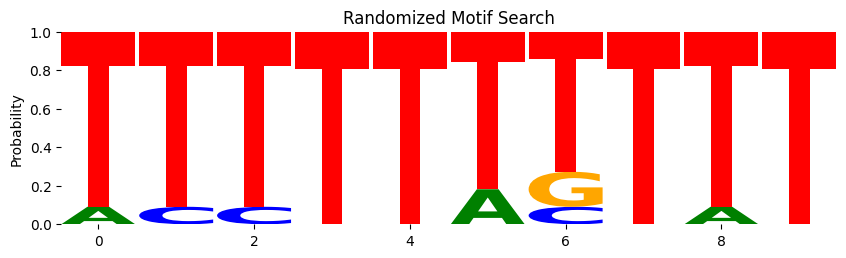

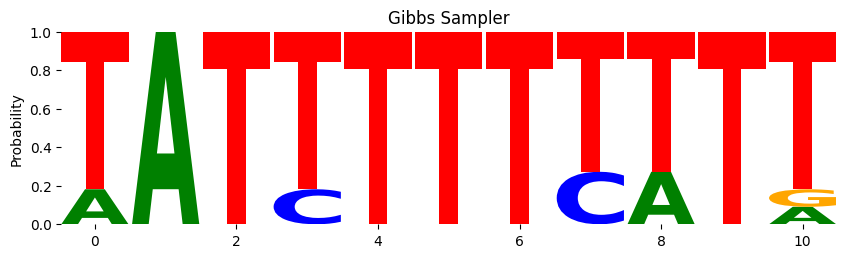

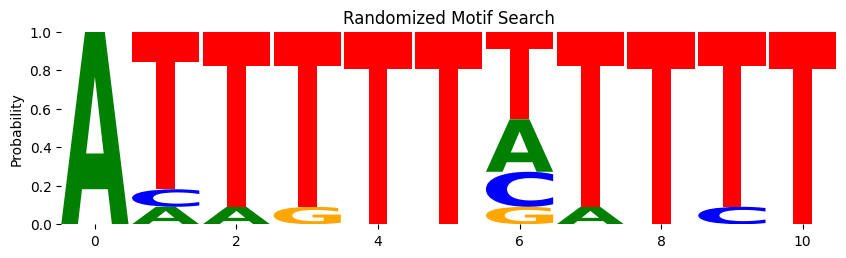

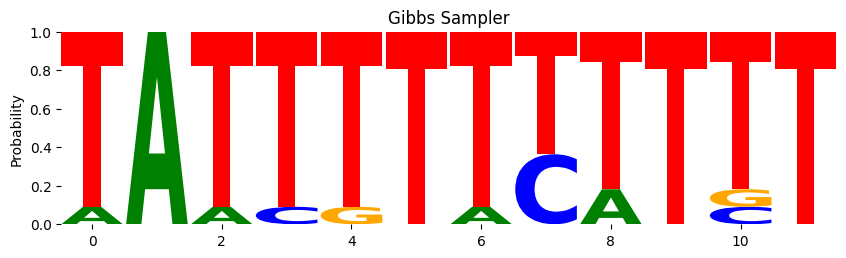

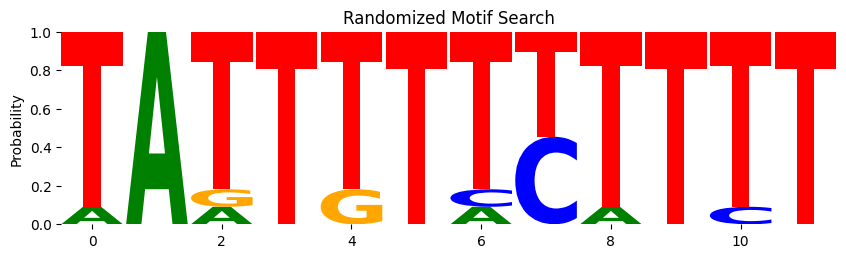

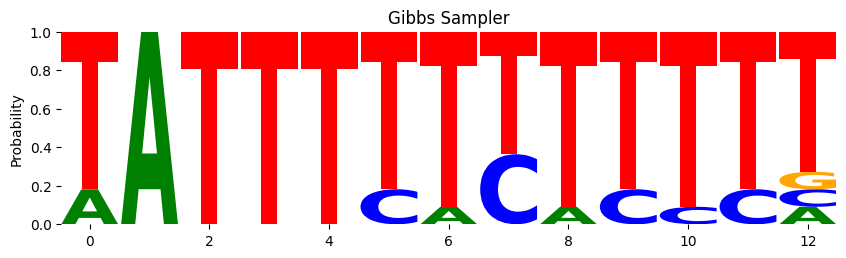

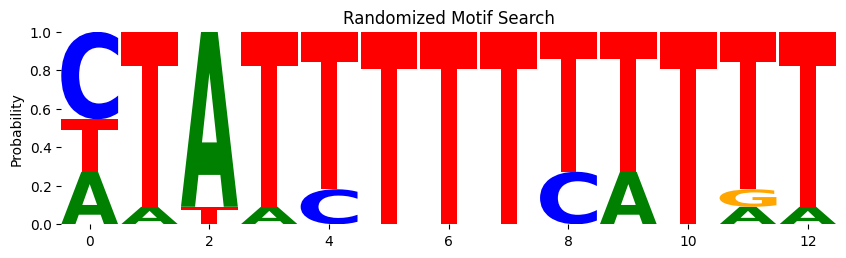

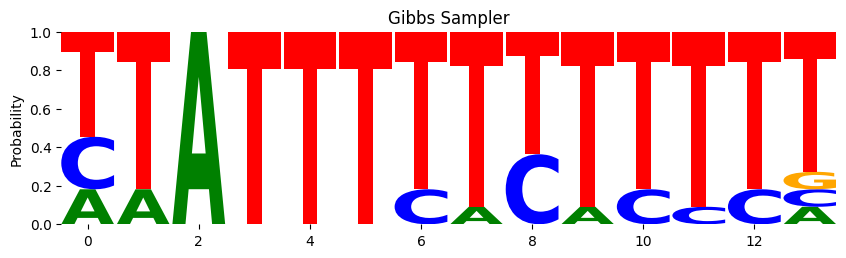

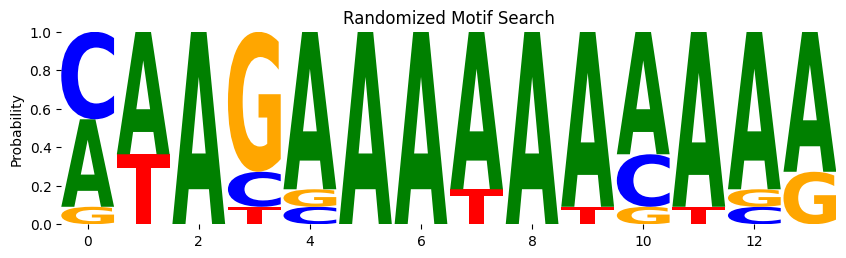

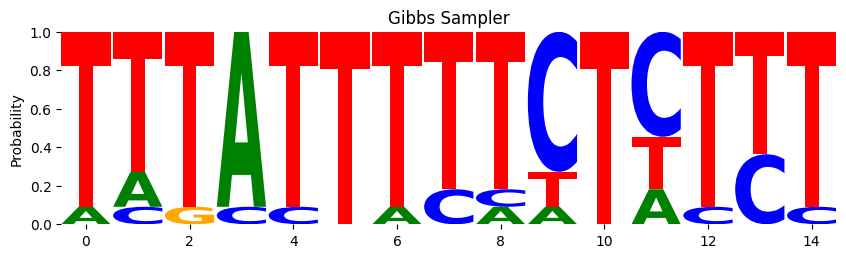

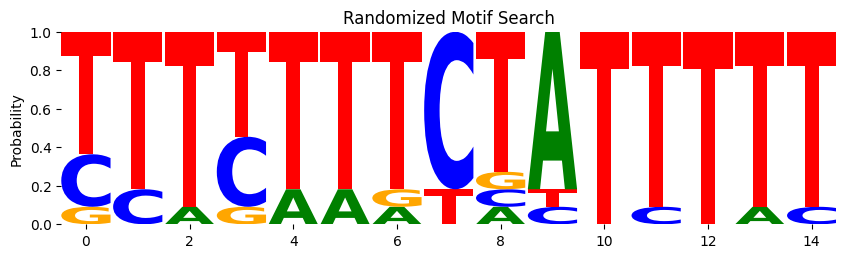

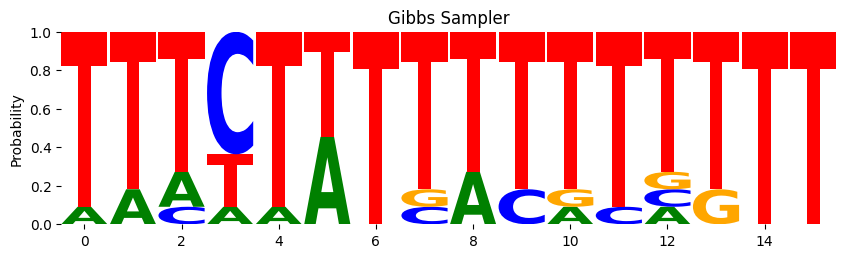

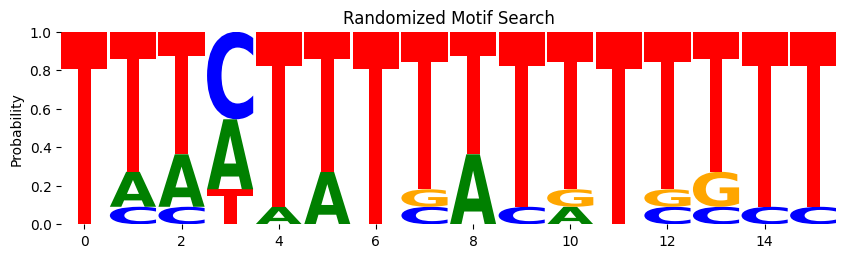

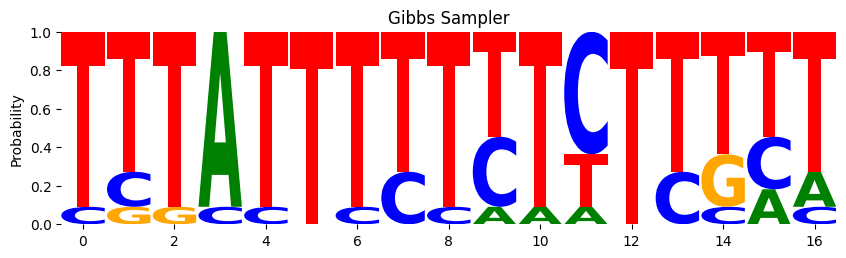

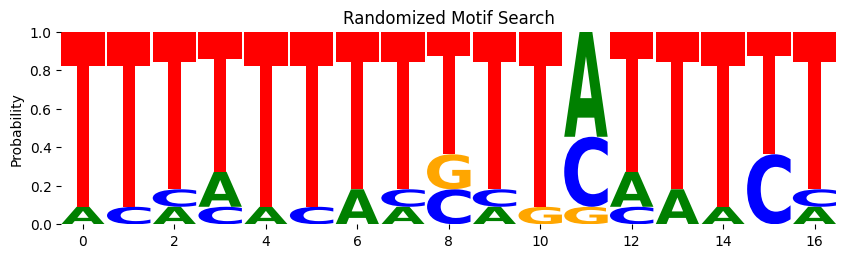

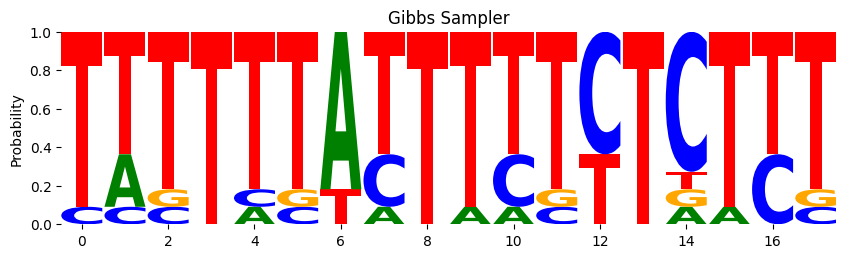

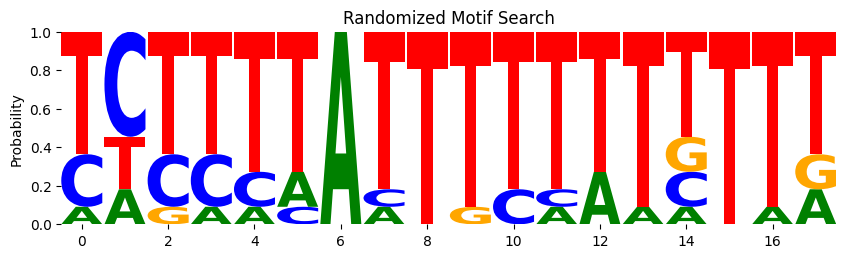

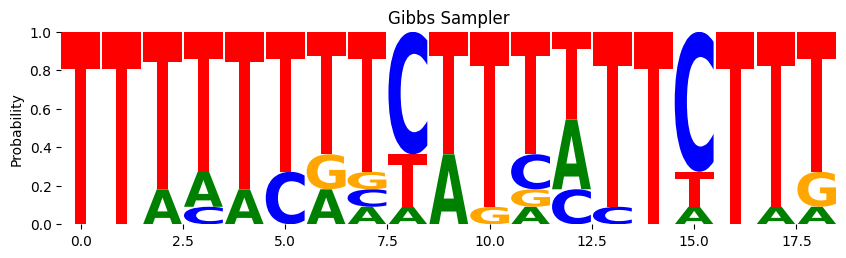

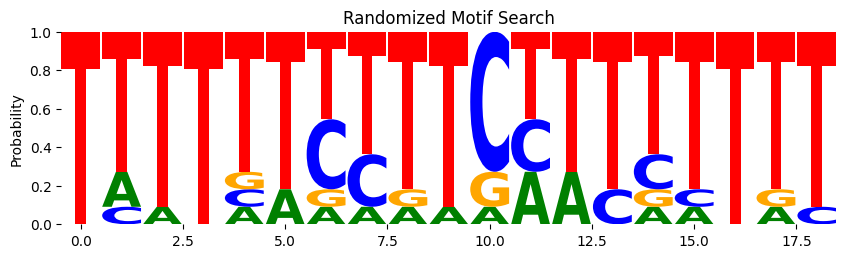

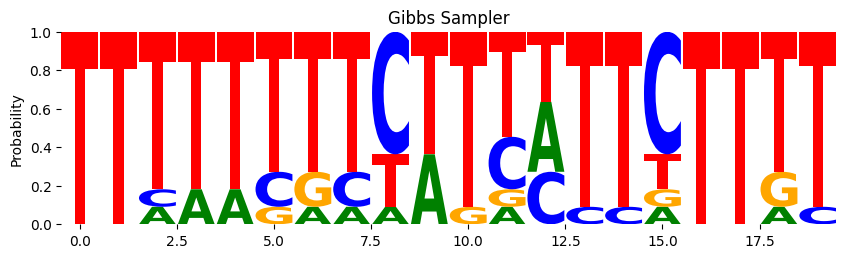

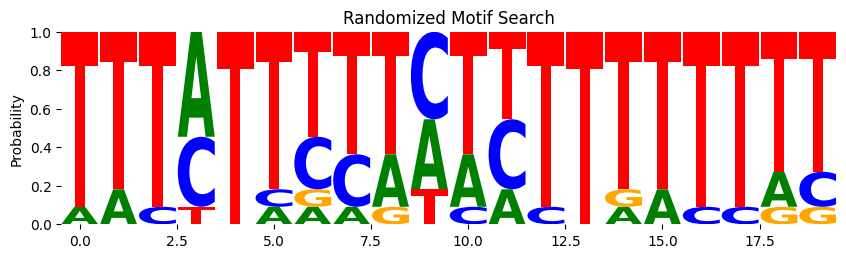

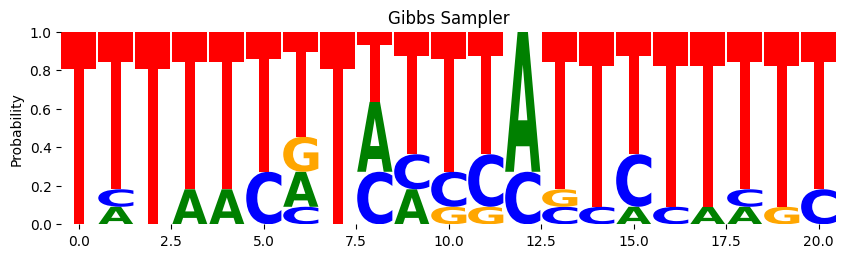

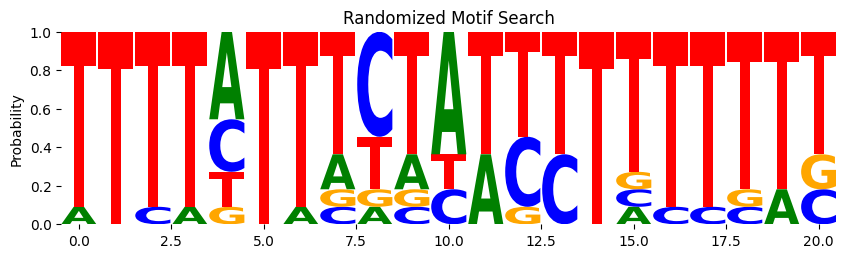

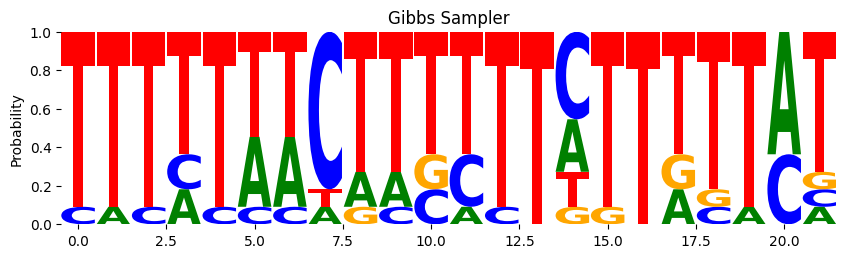

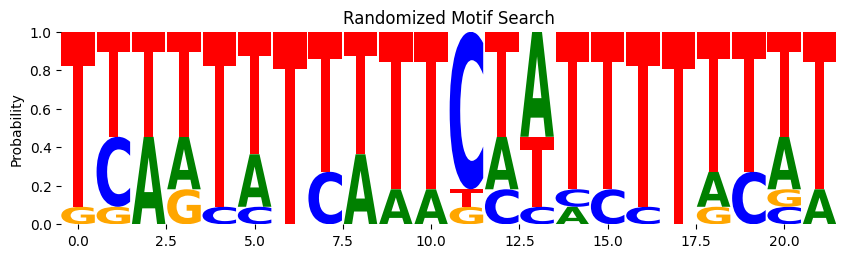

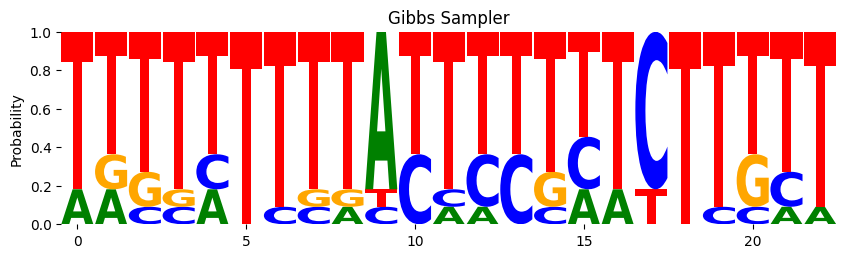

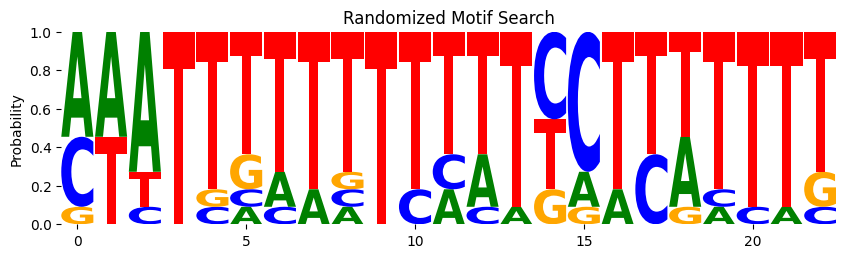

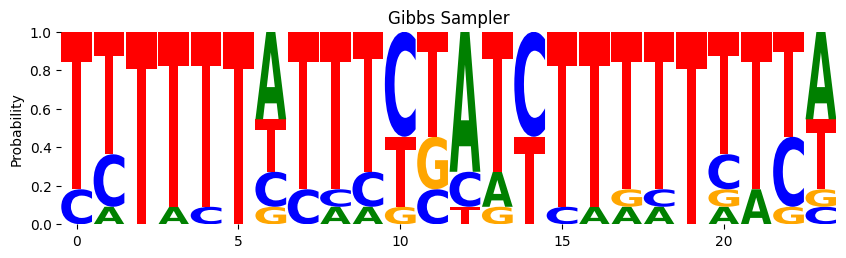

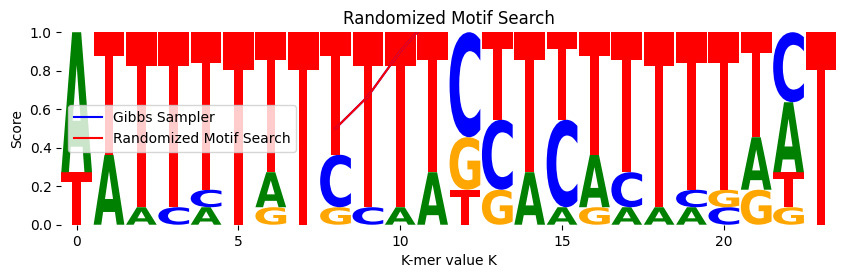

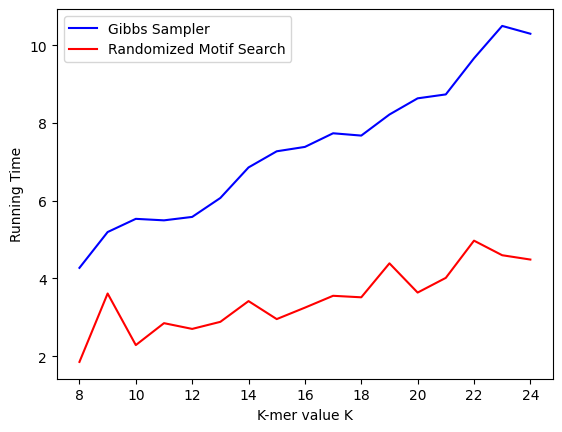

Best Motifs1:
Matrix of the motifs
TTTATTTT
TTTTTTTT
TTTTTTTT
TTTTTTTT
TTTTTTTT
TTTCTTTT
TTTTTTTT
TTTTTTTT
TTTTTTCT
TTTTTTTT
TTTCTTTT
Avg Score of the motifs:  0.5


     A  C   T
pos          
0    0  0  11
1    0  0  11
2    0  0  11
3    1  2   8
4    0  0  11
5    0  0  11
6    0  1  10
7    0  0  11
pos
0    11
1    11
2    11
3    11
4    11
5    11
6    11
7    11
dtype: int64
            A         C         T
pos                              
0    0.000000  0.000000  1.000000
1    0.000000  0.000000  1.000000
2    0.000000  0.000000  1.000000
3    0.090909  0.181818  0.727273
4    0.000000  0.000000  1.000000
5    0.000000  0.000000  1.000000
6    0.000000  0.090909  0.909091
7    0.000000  0.000000  1.000000
            A         C         T
pos                              
0    0.000000  0.000000  1.000000
1    0.000000  0.000000  1.000000
2    0.000000  0.000000  1.000000
3    0.090909  0.181818  0.727273
4    0.000000  0.000000  1.000000
5    0.000000  0.000000  1.000000
6

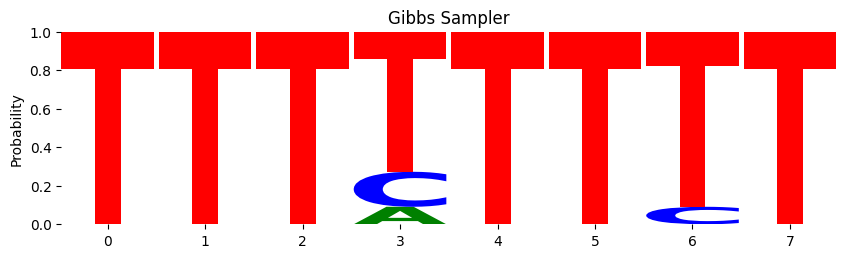

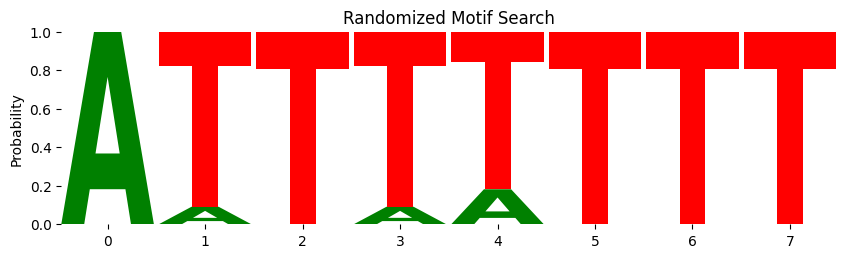

In [12]:
main()